In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [129]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Random Forest

In [131]:
rf_classifier = RandomForestClassifier(random_state=1)

In [132]:
param_grid = {
    'n_estimators': np.arange(1, 201, 1),
    'max_depth': np.arange(1, 11, 1)
}

In [133]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200])})

In [134]:
best_rf_classifier = grid_search.best_estimator_

In [135]:
print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)

Melhores hiperparâmetros encontrados: {'max_depth': 6, 'n_estimators': 5}


In [136]:
rf_classifier = best_rf_classifier

In [137]:
y_pred = rf_classifier.predict(X_test)

In [138]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=data.target_names)

In [139]:
accuracy

0.9385964912280702

In [140]:
print(classification_report_result)

              precision    recall  f1-score   support

   malignant       0.95      0.88      0.91        42
      benign       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### Unique Decision Tree

In [141]:
dt_classifier = DecisionTreeClassifier(random_state=1)

In [142]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [143]:
y_pred = dt_classifier.predict(X_test)

In [144]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=data.target_names)

In [145]:
accuracy

0.9473684210526315

In [146]:
print(classification_report_result)

              precision    recall  f1-score   support

   malignant       0.97      0.88      0.93        42
      benign       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### Visualização

In [147]:
depths = [estimator.tree_.max_depth for estimator in rf_classifier.estimators_]
avg_depth = sum(depths) / len(depths)
print(avg_depth)

5.8


In [148]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

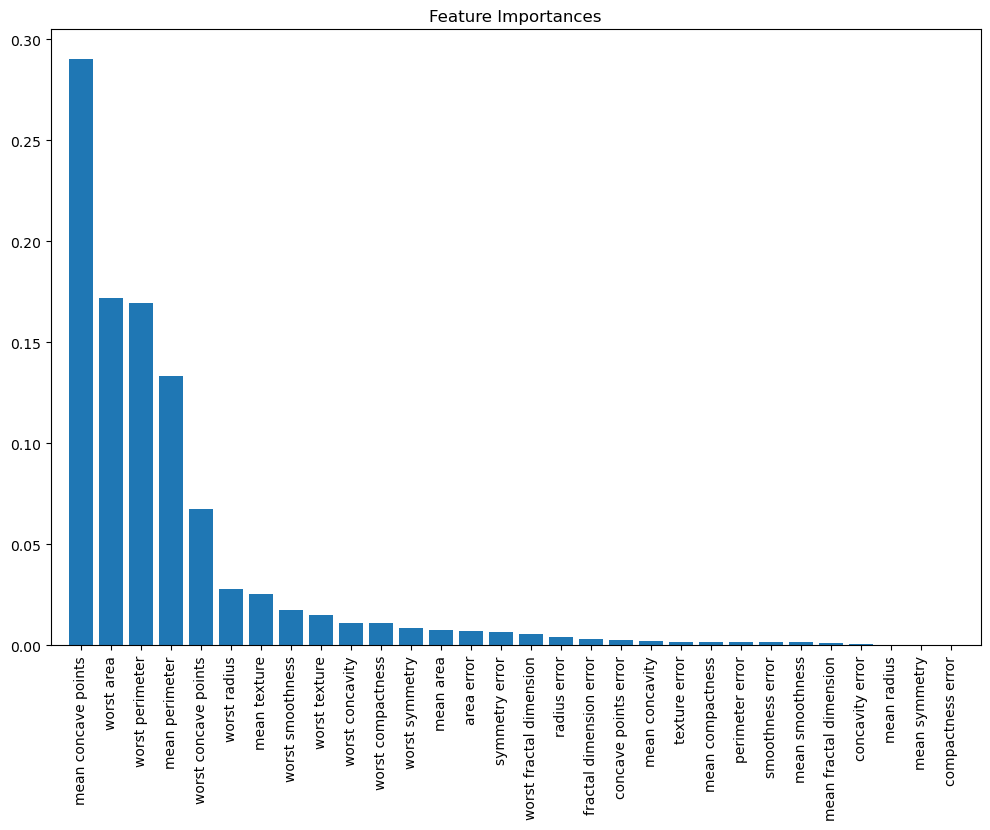

In [150]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()